# Prabal Ghosh
## Assignment - ADVANCED MORE ON MACHINE LEARNING ALGORITHMS

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ColumnSelector
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [3]:
# ! pip install emoji

In [4]:
# pip install mlxtend


In [5]:
import emoji
import string
# from spellchecker import SpellChecker
# from textblob import TextBlob
from nltk.stem import WordNetLemmatizer



## Dataset

In [6]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")

In [7]:
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

In [8]:
TRAIN.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0


In [9]:
TEST.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"Samsung 32GB Galaxy Note 10.1"" Android 4G LTE ...",NaN,499.99,4,The speed of this tablet is unreal! It is by f...,24.0
1,Kyocera Hydro C5170 PrePaid - Boost Mobile,NaN,27.47,4,i had been shopping for a smart phone from boo...,1.0


**Conversion of classes into 0 and 1 in TRAINING DATA SET**

In [10]:
TRAIN['Rating'] = TRAIN['Rating'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,1,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,1,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,1,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,1,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,1,Easy to use great price,0.0


**Conversion of classes into 0 and 1 in TEST DATA SET**

In [11]:
TEST['Rating'] = TEST['Rating'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
TEST.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"Samsung 32GB Galaxy Note 10.1"" Android 4G LTE ...",NaN,499.99,1,The speed of this tablet is unreal! It is by f...,24.0
1,Kyocera Hydro C5170 PrePaid - Boost Mobile,NaN,27.47,1,i had been shopping for a smart phone from boo...,1.0
2,"Apple iPhone 6 Plus Unlocked Cellphone, 16GB, ...",Apple,519.00,0,I would not recommend this phone.. It has a lo...,0.0
3,HTC One M8 - Factory Unlocked 32GB - US Warran...,HTC,138.99,0,NOT UNLOCKED!!!!! beware!!! Also as soon as I ...,NaN
4,T-Mobile Prepaid LG GS170 No-Contract Mobile P...,LG,299.99,1,This phone is a gift for my 80's something fri...,0.0


## X_TRAIN X_TEST Y_TRAIN Y_TEST DATA SELECTING 

In [12]:
X_TRAIN =  TRAIN.drop('Rating', axis=1)

In [13]:
Y_TRAIN = TRAIN["Rating"]

In [14]:
X_TEST = TEST.drop('Rating', axis=1)

In [15]:
Y_TEST = TEST["Rating"]

In [16]:
# Y_TEST

## PIPELINE

### CUSTOM FUNCTION TO handle Emoji in pipeline

In [17]:
import re
import emoji
from sklearn.base import BaseEstimator, TransformerMixin

class EmojiTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Apply the emoji handling transformation to each text in X
        X_transformed = [self.handle_emojis(text) for text in X]
        return X_transformed

    def handle_emojis(self, text):
        cleaned_text = handle_emojis(text)
        return cleaned_text

# function to handle emojis
def handle_emojis(text):
    return emoji.demojize(text)


### CUSTOM FUNCTION for Lemmatization in pipeline

In [18]:
class Lemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [' '.join([self.lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text.lower())]) for text in X]


### CUSTOM FUNCTION for stopward removal in pipeline

In [19]:
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
#  custom transformer for stopword removal
class StopwordRemover:
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        stop_words = set(stopwords.words('english'))
        return [' '.join([word for word in doc.split() if word.lower() not in stop_words]) for doc in X]
    

### MainPipeline

In [20]:


# Instantiate  custom transformers
emoji_transformer = EmojiTransformer()
stopwordremover = StopwordRemover()
lemmatizer = Lemmatizer()
# Create a pipeline 
pipeline = Pipeline([
    ('col_selector', ColumnSelector(cols=('Reviews'), drop_axis=True)),
    # ('col_selector', ColumnSelector(cols=['Reviews'])),  # Pass the column name as a list

    ('emoji', emoji_transformer),
    ('stopword_remover', stopwordremover),
    ('lemmatizer', lemmatizer),
    ('tfidf', TfidfVectorizer()),  
    ('lr', LogisticRegression(max_iter=50000)) 
])


In [21]:
pipeline

Pipeline(steps=[('col_selector',
                 ColumnSelector(cols='Reviews', drop_axis=True)),
                ('emoji', EmojiTransformer()),
                ('stopword_remover',
                 <__main__.StopwordRemover object at 0x00000207AC305DD0>),
                ('lemmatizer', Lemmatizer()), ('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(max_iter=50000))])

In [22]:
model = pipeline.fit(X_TRAIN, Y_TRAIN)


## EVALUATION

In [23]:
y_pred = model.predict(X_TEST)


Text(0.5, 1.0, 'Confusion matrix')

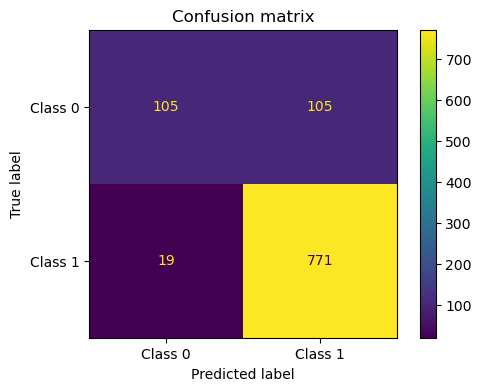

In [24]:


cm = confusion_matrix(Y_TEST, y_pred)

fig, ax = plt.subplots(figsize=(6, 4)) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
# disp.plot()
disp.plot(ax=ax)

disp.ax_.set_title('Confusion matrix')

In [25]:
f1 = f1_score(Y_TEST, y_pred, average='weighted')
accuracy = accuracy_score(Y_TEST, y_pred)


print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


F1 Score: 0.8632364083357894
Accuracy: 0.876
